In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

Read in data about awareness and C02 emissions by country

In [2]:
df_2 = pd.read_excel("Datasets/awareness_by_percentage.xlsx",header=1)
df_2

,WP5,Country,ISO,Region,Sub_region,Sample.2007,Sample.2008,Sample.Total,Population.2008,WPCIAS,...,Ratio_aware,Serious,Not_serious,RF_serious,AUC_serious,CITree_serious,Top1_serious,Top2_serious,Top3_serious,Ratio_serious
0,70,Afghanistan,AFG,Asia,Western Asia,0,1010,1010,1.374134e+07,6.43203,...,5.128087,73.758541,26.241459,76.838235,0.911369,76.84,Education,Cause_Global_Warming,Civic_Engagement,1.111990
1,56,Angola,AGO,Africa,Central Africa,0,1000,1000,9.547243e+06,0.56262,...,1.741134,91.369828,8.630172,91.441441,0.964999,91.44,Local_temp_perception,Cause_Global_Warming,Water_quality,1.087682
2,87,Argentina,ARG,Latin America & Caribbean,Southern South America,1000,1000,2000,2.959425e+07,9.07022,...,1.581608,94.361150,5.638850,94.885246,0.959696,94.89,Cause_Global_Warming,EnvBehavior,Water_quality,9.268735
3,88,Armenia,ARM,Europe,Eastern Europe,1000,1000,2000,2.357567e+06,0.00485,...,1.565761,85.270095,14.729905,85.575049,0.923899,85.58,Urban_Rural,Local_temp_perception,EnvBehavior,1.989427
4,47,Australia,AUS,Europe (Oceania),Western Europe (AustraliaNZ),0,1005,1005,1.728642e+07,6.97902,...,1.012210,78.247424,21.752576,84.237462,0.904631,81.88,Cause_Global_Warming,Gov_effort_env_preservation,EnvBehavior,2.734019
5,89,Austria,AUT,Europe,Western Europe,0,1001,1001,7.069420e+06,0.01200,...,NaN,58.776916,41.223084,72.269807,0.833362,63.60,Cause_Global_Warming,Air_quality,Gov_effort_env_preservation,4.696786
6,100,Burundi,BDI,Africa,Central Africa,0,1000,1000,4.816158e+06,5.06810,...,3.458226,92.429415,7.570585,91.129032,0.966814,91.13,NIL,NIL,NIL,NaN
7,16,Belgium,BEL,Europe,Western Europe,1022,1002,2024,8.907741e+06,0.01541,...,1.067839,78.320368,21.679632,80.571429,0.877324,80.29,Cause_Global_Warming,NIL,NIL,NaN
8,42,Benin,BEN,Africa,Coastal West Africa,0,1000,1000,5.036514e+06,0.41096,...,2.532784,73.143529,26.856471,81.314879,0.937281,81.66,Local_temp_perception,Water_quality,Air_quality,1.770087
9,78,Burkina Faso,BFA,Africa,Sahelian Africa,1000,1000,2000,7.879866e+06,0.33078,...,2.413875,94.886229,5.113771,96.113074,0.983809,96.11,Physical_Wellbeing,Cause_Global_Warming,Urban_Rural,1.240307


Choose which columns to keep

In [3]:
list(df_2.columns)

['WP5',
 'Country',
 'ISO',
 'Region',
 'Sub_region',
 'Sample.2007',
 'Sample.2008',
 'Sample.Total',
 'Population.2008',
 'WPCIAS',
 'SPCIAS',
 'APCIAS',
 'HDI',
 'CO2emi',
 'GDPperUS',
 'glo_tot',
 'Efcon',
 'TotBioCap',
 'VA',
 'PS',
 'GovE',
 'RQ',
 'RL',
 'CC',
 'WGI',
 'Aware',
 'Unaware',
 'RF_aware',
 'AUC_aware',
 'CI_aware',
 'Top_aware',
 'Top2_aware',
 'Top3_aware',
 'Ratio_aware',
 'Serious',
 'Not_serious',
 'RF_serious',
 'AUC_serious',
 'CITree_serious',
 'Top1_serious',
 'Top2_serious',
 'Top3_serious',
 'Ratio_serious']

In [4]:
columns_keep = ['WP5','Country','Region','Sub_region','Sample.2007','Sample.2008','Sample.Total','Population.2008','CO2emi','GDPperUS','glo_tot','Aware','Unaware','Top_aware','Top2_aware','Top3_aware','Ratio_aware','Serious','Not_serious','Top1_serious','Top2_serious','Top3_serious','Ratio_serious']
df = df_2[columns_keep]
df

,WP5,Country,Region,Sub_region,Sample.2007,Sample.2008,Sample.Total,Population.2008,CO2emi,GDPperUS,...,Top_aware,Top2_aware,Top3_aware,Ratio_aware,Serious,Not_serious,Top1_serious,Top2_serious,Top3_serious,Ratio_serious
0,70,Afghanistan,Asia,Western Asia,0,1010,1010,1.374134e+07,0.022613,307.989202,...,Education,Gender,Income,5.128087,73.758541,26.241459,Education,Cause_Global_Warming,Civic_Engagement,1.111990
1,56,Angola,Africa,Central Africa,0,1000,1000,9.547243e+06,1.435174,3449.376803,...,Education,Financial_Wellbeing,EnvBehavior,1.741134,91.369828,8.630172,Local_temp_perception,Cause_Global_Warming,Water_quality,1.087682
2,87,Argentina,Latin America & Caribbean,Southern South America,1000,1000,2000,2.959425e+07,4.666922,6623.863698,...,Income,Education,EnvBehavior,1.581608,94.361150,5.638850,Cause_Global_Warming,EnvBehavior,Water_quality,9.268735
3,88,Armenia,Europe,Eastern Europe,1000,1000,2000,2.357567e+06,1.644924,2994.708990,...,Education,Urban_Rural,EnvBehavior,1.565761,85.270095,14.729905,Urban_Rural,Local_temp_perception,EnvBehavior,1.989427
4,47,Australia,Europe (Oceania),Western Europe (AustraliaNZ),0,1005,1005,1.728642e+07,18.071623,40660.403930,...,Education,EnvBehavior,Gov_effort_env_preservation,1.012210,78.247424,21.752576,Cause_Global_Warming,Gov_effort_env_preservation,EnvBehavior,2.734019
5,89,Austria,Europe,Western Europe,0,1001,1001,7.069420e+06,8.289284,44850.116610,...,NIL,NIL,NIL,NaN,58.776916,41.223084,Cause_Global_Warming,Air_quality,Gov_effort_env_preservation,4.696786
6,100,Burundi,Africa,Central Africa,0,1000,1000,4.816158e+06,0.023788,127.116352,...,Education,Air_quality,Income,3.458226,92.429415,7.570585,NIL,NIL,NIL,NaN
7,16,Belgium,Europe,Western Europe,1022,1002,2024,8.907741e+06,9.649183,43161.366020,...,Education,Communications,EnvBehavior,1.067839,78.320368,21.679632,Cause_Global_Warming,NIL,NIL,NaN
8,42,Benin,Africa,Coastal West Africa,0,1000,1000,5.036514e+06,0.478231,683.652130,...,Education,Communications,Urban_Rural,2.532784,73.143529,26.856471,Local_temp_perception,Water_quality,Air_quality,1.770087
9,78,Burkina Faso,Africa,Sahelian Africa,1000,1000,2000,7.879866e+06,0.109320,449.301458,...,Communications,Education,Income,2.413875,94.886229,5.113771,Physical_Wellbeing,Cause_Global_Warming,Urban_Rural,1.240307


Make country the index

In [5]:
df.corr()

,WP5,Sample.2007,Sample.2008,Sample.Total,Population.2008,CO2emi,GDPperUS,glo_tot,Aware,Unaware,Ratio_aware,Serious,Not_serious,Ratio_serious
WP5,1.000000,-0.130611,-0.207880,-0.207150,-0.231023,0.041835,-0.029540,-0.176240,-0.054684,0.054684,0.129543,-0.008716,0.008716,-0.073860
Sample.2007,-0.130611,1.000000,0.243126,0.847005,0.595870,-0.009813,-0.131566,0.146818,0.192937,-0.192937,-0.013328,-0.105003,0.105003,0.006265
Sample.2008,-0.207880,0.243126,1.000000,0.721564,0.532645,-0.055350,-0.075360,-0.034185,-0.089854,0.089854,0.090360,-0.140172,0.140172,0.065463
Sample.Total,-0.207150,0.847005,0.721564,1.000000,0.717216,-0.037337,-0.135207,0.086059,0.088469,-0.088469,0.040128,-0.151766,0.151766,0.040605
Population.2008,-0.231023,0.595870,0.532645,0.717216,1.000000,0.002293,-0.053062,-0.007911,-0.043164,0.043164,0.024634,-0.162558,0.162558,0.062283
CO2emi,0.041835,-0.009813,-0.055350,-0.037337,0.002293,1.000000,0.660225,0.480345,0.453955,-0.453955,-0.143676,-0.254957,0.254957,0.170094
GDPperUS,-0.029540,-0.131566,-0.075360,-0.135207,-0.053062,0.660225,1.000000,0.721656,0.660692,-0.660692,-0.232656,-0.365417,0.365417,0.407182
glo_tot,-0.176240,0.146818,-0.034185,0.086059,-0.007911,0.480345,0.721656,1.000000,0.762923,-0.762923,-0.173540,-0.262029,0.262029,0.397340
Aware,-0.054684,0.192937,-0.089854,0.088469,-0.043164,0.453955,0.660692,0.762923,1.000000,-1.000000,-0.230823,-0.329110,0.329110,0.314998
Unaware,0.054684,-0.192937,0.089854,-0.088469,0.043164,-0.453955,-0.660692,-0.762923,-1.000000,1.000000,0.230823,0.329110,-0.329110,-0.314998


In [6]:
df.set_index('Country')

,WP5,Region,Sub_region,Sample.2007,Sample.2008,Sample.Total,Population.2008,CO2emi,GDPperUS,glo_tot,...,Top_aware,Top2_aware,Top3_aware,Ratio_aware,Serious,Not_serious,Top1_serious,Top2_serious,Top3_serious,Ratio_serious
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,70,Asia,Western Asia,0,1010,1010,1.374134e+07,0.022613,307.989202,30.30,...,Education,Gender,Income,5.128087,73.758541,26.241459,Education,Cause_Global_Warming,Civic_Engagement,1.111990
Angola,56,Africa,Central Africa,0,1000,1000,9.547243e+06,1.435174,3449.376803,46.61,...,Education,Financial_Wellbeing,EnvBehavior,1.741134,91.369828,8.630172,Local_temp_perception,Cause_Global_Warming,Water_quality,1.087682
Argentina,87,Latin America & Caribbean,Southern South America,1000,1000,2000,2.959425e+07,4.666922,6623.863698,60.01,...,Income,Education,EnvBehavior,1.581608,94.361150,5.638850,Cause_Global_Warming,EnvBehavior,Water_quality,9.268735
Armenia,88,Europe,Eastern Europe,1000,1000,2000,2.357567e+06,1.644924,2994.708990,52.88,...,Education,Urban_Rural,EnvBehavior,1.565761,85.270095,14.729905,Urban_Rural,Local_temp_perception,EnvBehavior,1.989427
Australia,47,Europe (Oceania),Western Europe (AustraliaNZ),0,1005,1005,1.728642e+07,18.071623,40660.403930,81.17,...,Education,EnvBehavior,Gov_effort_env_preservation,1.012210,78.247424,21.752576,Cause_Global_Warming,Gov_effort_env_preservation,EnvBehavior,2.734019
Austria,89,Europe,Western Europe,0,1001,1001,7.069420e+06,8.289284,44850.116610,91.49,...,NIL,NIL,NIL,NaN,58.776916,41.223084,Cause_Global_Warming,Air_quality,Gov_effort_env_preservation,4.696786
Burundi,100,Africa,Central Africa,0,1000,1000,4.816158e+06,0.023788,127.116352,34.48,...,Education,Air_quality,Income,3.458226,92.429415,7.570585,NIL,NIL,NIL,NaN
Belgium,16,Europe,Western Europe,1022,1002,2024,8.907741e+06,9.649183,43161.366020,92.81,...,Education,Communications,EnvBehavior,1.067839,78.320368,21.679632,Cause_Global_Warming,NIL,NIL,NaN
Benin,42,Africa,Coastal West Africa,0,1000,1000,5.036514e+06,0.478231,683.652130,45.07,...,Education,Communications,Urban_Rural,2.532784,73.143529,26.856471,Local_temp_perception,Water_quality,Air_quality,1.770087


In [7]:
#sort CO2 emission 
df = df.sort_values('CO2emi')

Plot CO2 emissions by country

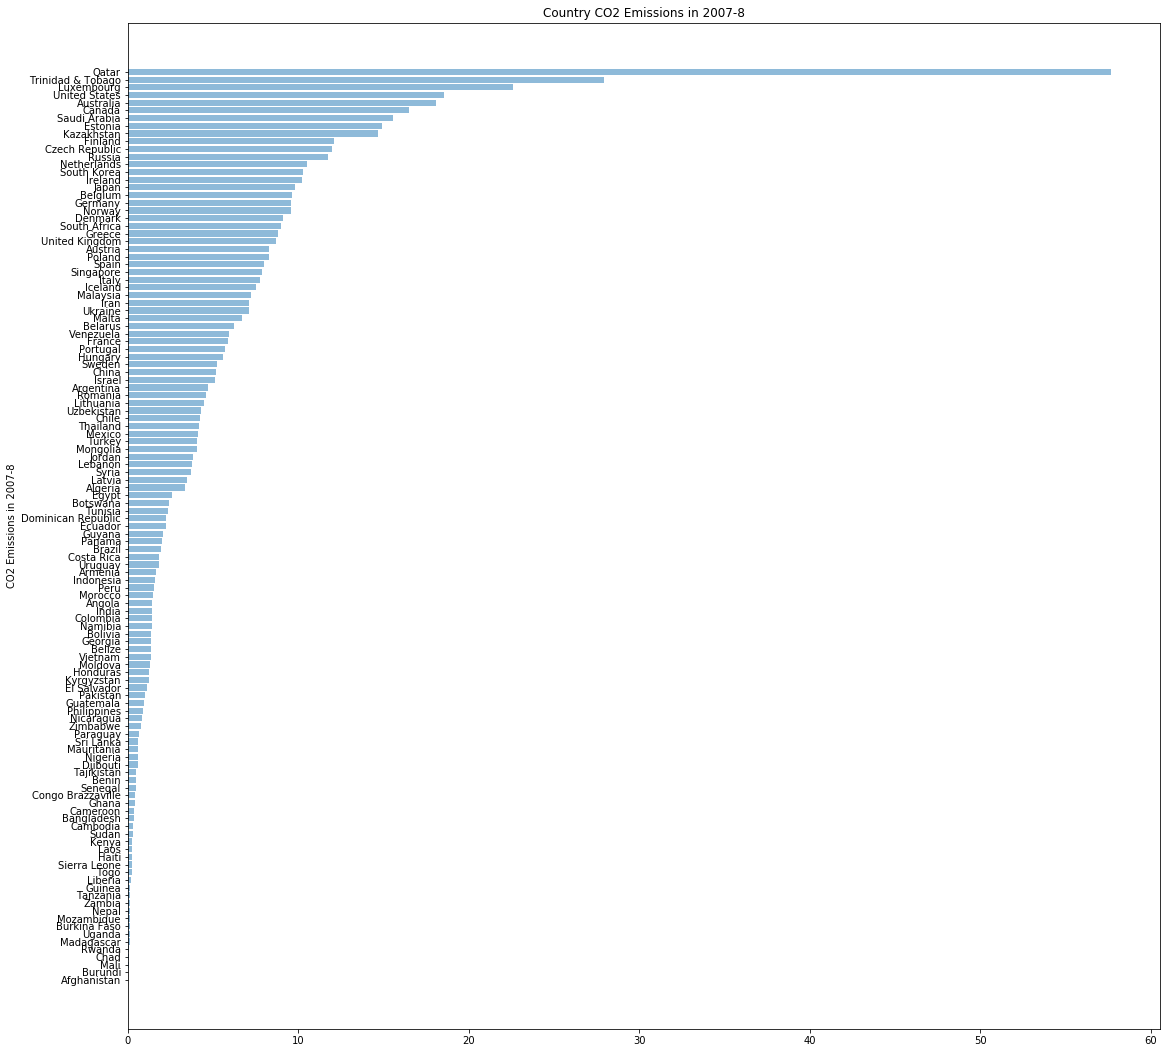

In [8]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df['Country']))

plt.barh(y_pos, df['CO2emi'], align='center', alpha=0.5)
plt.yticks(y_pos, df['Country'])
plt.ylabel('CO2 Emissions in 2007-8')
plt.title('Country CO2 Emissions in 2007-8')
fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
plt.show()

Create a smaller dataframe

In [9]:
keep = ['Country','Population.2008','CO2emi','GDPperUS','glo_tot','Aware','Serious']
df_numbers = df_2[keep]
df_numbers.set_index('Country')

,Population.2008,CO2emi,GDPperUS,glo_tot,Aware,Serious
Country,,,,,,
Afghanistan,1.374134e+07,0.022613,307.989202,30.30,25.445975,73.758541
Angola,9.547243e+06,1.435174,3449.376803,46.61,42.877795,91.369828
Argentina,2.959425e+07,4.666922,6623.863698,60.01,76.460368,94.361150
Armenia,2.357567e+06,1.644924,2994.708990,52.88,78.151156,85.270095
Australia,1.728642e+07,18.071623,40660.403930,81.17,97.324499,78.247424
Austria,7.069420e+06,8.289284,44850.116610,91.49,94.785514,58.776916
Burundi,4.816158e+06,0.023788,127.116352,34.48,21.722146,92.429415
Belgium,8.907741e+06,9.649183,43161.366020,92.81,89.224846,78.320368
Benin,5.036514e+06,0.478231,683.652130,45.07,20.675555,73.143529


In [10]:
df_numbers.dropna

<bound method DataFrame.dropna of                 Country  Population.2008     CO2emi      GDPperUS  glo_tot  \
0           Afghanistan     1.374134e+07   0.022613    307.989202    30.30   
1                Angola     9.547243e+06   1.435174   3449.376803    46.61   
2             Argentina     2.959425e+07   4.666922   6623.863698    60.01   
3               Armenia     2.357567e+06   1.644924   2994.708990    52.88   
4             Australia     1.728642e+07  18.071623  40660.403930    81.17   
5               Austria     7.069420e+06   8.289284  44850.116610    91.49   
6               Burundi     4.816158e+06   0.023788    127.116352    34.48   
7               Belgium     8.907741e+06   9.649183  43161.366020    92.81   
8                 Benin     5.036514e+06   0.478231    683.652130    45.07   
9          Burkina Faso     7.879866e+06   0.109320    449.301458    43.27   
10           Bangladesh     9.953712e+07   0.326002    475.249651    40.95   
11              Belarus     8.

Check correlations between CO2emi and other variables

In [11]:
# aware = df_numbers['CO2emi'].corr(df_numbers['Ratio_aware'])
# serious = df_numbers['CO2emi'].corr(df_numbers['Ratio_serious'])
# population = df_numbers['CO2emi'].corr(df_numbers['Population.2008'])
# GDPperUS = df_numbers['CO2emi'].corr(df_numbers['GDPperUS'])
# df_corr = [aware,serious,population,GDPperUS]
# print(aware)
# print(serious)
# print(population)
# print(GDPperUS)
# df_corr = ['aware','serious','population','GDPperUS','df_corr']
#high correlation b/w GDPperUS and CO2emi
#negative correlation b/w aware (weird)
#positive correlation b/w serious (more emissions = more serious threat? (of the ones who are aware))

check correlations between awareness and seriousness

In [12]:
# aware_serious = df_numbers['Ratio_aware'].corr(df_numbers['Ratio_serious'])
# print(aware_serious)
# #some who are aware are not serious

check correlations using Pearson correlation

In [13]:
np.corrcoef(df_numbers['CO2emi'], df_numbers['Serious'])

array([[ 1.        , -0.25495736],
       [-0.25495736,  1.        ]])

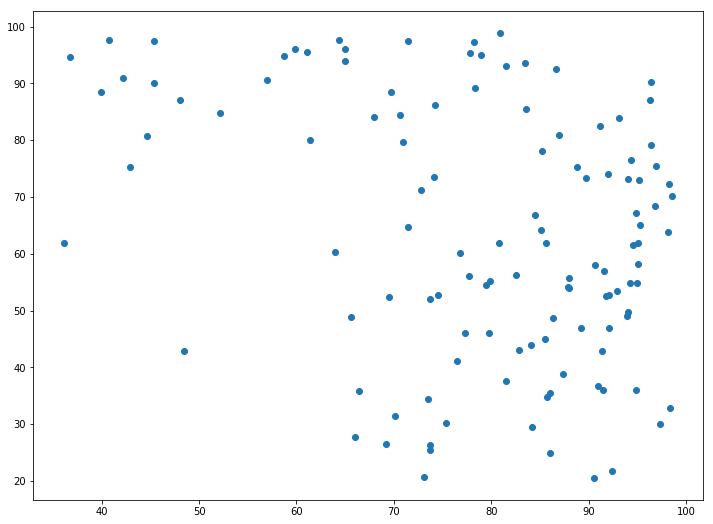

In [14]:
plt.scatter(df_numbers['Serious'], df_numbers['Aware'])

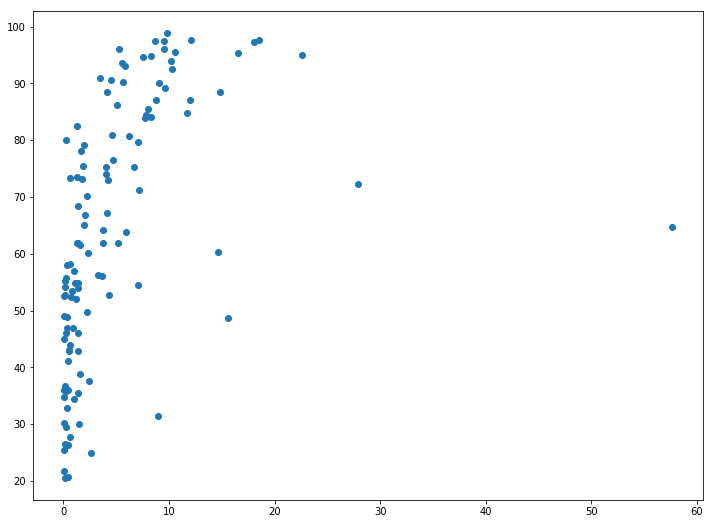

In [15]:
plt.scatter(df_numbers['CO2emi'], df_numbers['Aware'])
#to do: look for clusters (maybe region, something else?)

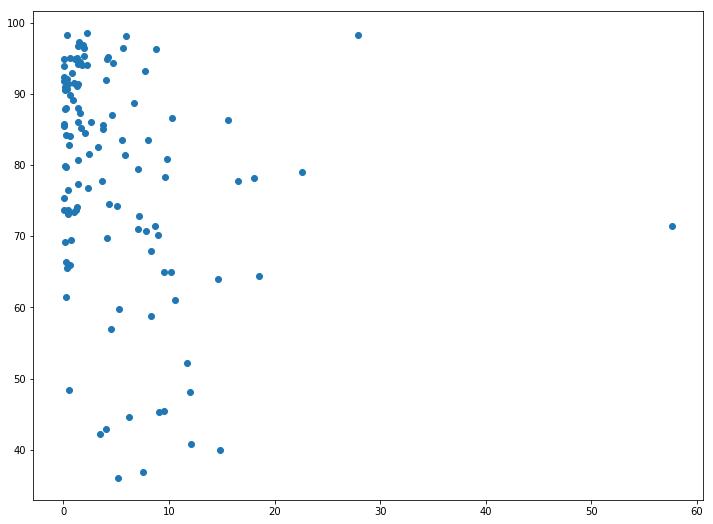

In [16]:
plt.scatter(df_numbers['CO2emi'], df_numbers['Serious'])

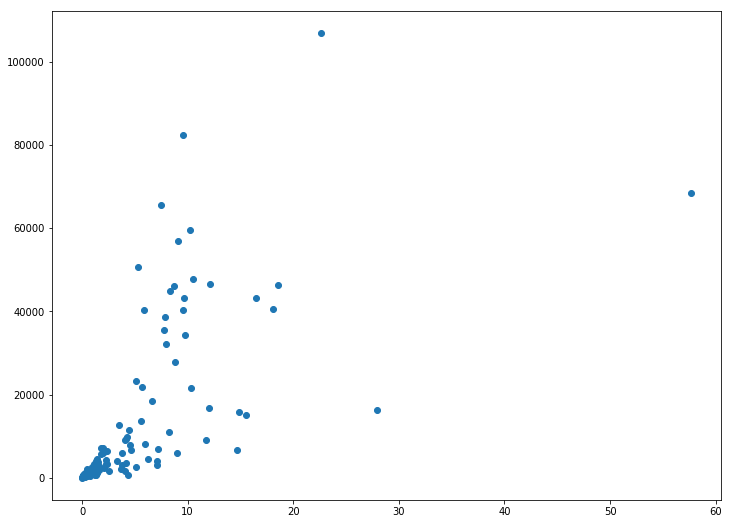

In [17]:
plt.scatter(df_numbers['CO2emi'], df_numbers['GDPperUS'])

In [18]:
df_numbers.corr()

,Population.2008,CO2emi,GDPperUS,glo_tot,Aware,Serious
Population.2008,1.000000,0.002293,-0.053062,-0.007911,-0.043164,-0.162558
CO2emi,0.002293,1.000000,0.660225,0.480345,0.453955,-0.254957
GDPperUS,-0.053062,0.660225,1.000000,0.721656,0.660692,-0.365417
glo_tot,-0.007911,0.480345,0.721656,1.000000,0.762923,-0.262029
Aware,-0.043164,0.453955,0.660692,0.762923,1.000000,-0.329110
Serious,-0.162558,-0.254957,-0.365417,-0.262029,-0.329110,1.000000


In [22]:
#linear model to predict CO2emi from awareness
outcome_1,predictors_1 = patsy.dmatrices('CO2emi ~ Aware', df_numbers)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO2emi   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.37
Date:                Mon, 20 May 2019   Prob (F-statistic):           2.16e-07
Time:                        22:03:46   Log-Likelihood:                -388.10
No. Observations:                 119   AIC:                             780.2
Df Residuals:                     117   BIC:                             785.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2222      1.753     -2.408      0.0

In [ ]:
#awareness predicts CO2emi based on p value < .01

In [21]:
#multivariate regression to predict CO2emi from both awareness and GDPperUS
outcome_2,predictors_2 = patsy.dmatrices('CO2emi ~ GDPperUS + Aware', df_numbers)
mod_2 = sm.OLS(outcome,predictors)
res_2 = mod.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO2emi   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     44.92
Date:                Mon, 20 May 2019   Prob (F-statistic):           3.58e-15
Time:                        22:01:28   Log-Likelihood:                -367.70
No. Observations:                 119   AIC:                             741.4
Df Residuals:                     116   BIC:                             749.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3135      1.687      0.778      0.4

In [ ]:
#Awareness does not predict CO2emi based on p value < .01 when GDPperUS is factored in